In [1]:
import pandas as pd
import os, re
import csv
import numpy as np

In [2]:
# Change the work directory to the parent
try:
    if chdir:
        pass
except:
    current_dir = os.getcwd()
    os.chdir(current_dir +"/..")
    os.path.abspath(os.curdir)

In [3]:
chdir = True

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 11})

plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 300

In [3]:
# Metadata for specific SFC configurations
exp_ls = "exp-3"


In [4]:
def print_headers(exp_type, exp_num, file):
    file_path = os.path.join("..\\bridge\\data", exp_type, exp_num, file)

    with open(file_path, newline='') as csvfile:
        reader = csv.reader(csvfile)
        headers = next(reader)  
        print("header：", headers)
    return headers


#print_headers("fixed_rate", exp_ls, "bridge-pcm-new.csv")


In [5]:
def parse_seq(exp_type, exp_num, file, index=5):
    "Parse sequential data, specialized for the TX/RX/Latency experiments"
    tmp = []
    
    if file.startswith("latency_new.csv"):
        with open(os.path.join("..\\bridge\\data", exp_type, exp_num, file)) as f:
            lines = f.readlines()[4:] if exp_type == "random_input_rate" else f.readlines()
            for i in range(len(lines)):
                try:
                    value = float(lines[i].strip()) / 1000
                except ValueError:
                    value= np.nan
                tmp.append(value)
    else:
        with open(os.path.join("..\\bridge\\data", exp_type, exp_num, file)) as f:
            next(f)
            for l in f:
                try:
                    value = float(l.strip().split(",")[index])
                except ValueError:
                    value = np.nan
                tmp.append(value)
                
    return tmp

In [6]:
def parse_reg(exp_type, exp_num, file, stat_name):
    stat = []
    file_path = os.path.join("..\\bridge\\data", exp_type, exp_num, file)

    with open(file_path, newline='') as csvfile:
        reader = csv.reader(csvfile)
        headers = next(reader)
        try:
            index = headers.index(stat_name)
        except ValueError:
            print(f"Column {stat_name} not found")
            return stat
        for row in reader:
            if len(row) <= index: 
                continue  

            raw_value = row[index]
            try:
                value = float(raw_value)
            except ValueError:
                value = raw_value
            stat.append(value)


    return stat

In [7]:
latency = parse_seq("random_input_rate", exp_ls, "latency_new.csv")
len(latency)

1531

In [8]:
tx_stats = parse_seq("random_input_rate", exp_ls,  "tx_stats.csv")
len(tx_stats)

1532

In [9]:
rx_stats = parse_seq("random_input_rate", exp_ls,  "rx_stats.csv")
len(rx_stats)

1532

In [10]:
bridge_L3MISS = parse_reg("random_input_rate", exp_ls,  "bridge-pcm_new.csv", "Socket 0-L3HIT")
print(len(bridge_L3MISS))

4054


In [11]:
features = print_headers("random_input_rate", exp_ls, "bridge-pcm_new.csv")

header： ['System-Date', 'System-Time', 'Socket 0-EXEC', 'Socket 0-IPC', 'Socket 0-FREQ', 'Socket 0-AFREQ', 'Socket 0-L3MISS', 'Socket 0-L2MISS', 'Socket 0-L3HIT', 'Socket 0-L2HIT', 'Socket 0-L3MPI', 'Socket 0-L2MPI', 'Socket 0-L3OCC', 'Socket 0-READ', 'Socket 0-WRITE', 'Socket 0-LOCAL', 'Socket 0-TEMP', 'Socket 0-INST', 'Socket 0-ACYC', 'Socket 0-TIME(ticks)', 'Socket 0-PhysIPC', 'Socket 0-PhysIPC%', 'Socket 0-INSTnom', 'Socket 0-INSTnom%', 'Socket 1-EXEC', 'Socket 1-IPC', 'Socket 1-FREQ', 'Socket 1-AFREQ', 'Socket 1-L3MISS', 'Socket 1-L2MISS', 'Socket 1-L3HIT', 'Socket 1-L2HIT', 'Socket 1-L3MPI', 'Socket 1-L2MPI', 'Socket 1-L3OCC', 'Socket 1-READ', 'Socket 1-WRITE', 'Socket 1-LOCAL', 'Socket 1-TEMP', 'Socket 1-INST', 'Socket 1-ACYC', 'Socket 1-TIME(ticks)', 'Socket 1-PhysIPC', 'Socket 1-PhysIPC%', 'Socket 1-INSTnom', 'Socket 1-INSTnom%', 'SKT0 Core C-State-C0res%', 'SKT0 Core C-State-C1res%', 'SKT0 Core C-State-C3res%', 'SKT0 Core C-State-C6res%', 'SKT0 Core C-State-C7res%', 'SKT0 Pac

In [12]:
features_pcie = print_headers("random_input_rate", exp_ls, "pcm-pcie_new.csv")

header： ['skt-0_PCIRdCur', 'skt-0_RFO', 'skt-0_CRd', 'skt-0_DRd', 'skt-0_ItoM', 'skt-0_PRd', 'skt-0_WiL', 'skt-1_PCIRdCur', 'skt-1_RFO', 'skt-1_CRd', 'skt-1_DRd', 'skt-1_ItoM', 'skt-1_PRd', 'skt-1_WiL']


In [13]:
features_memory = print_headers("random_input_rate", exp_ls, "pcm-memory_new.csv")

header： ['', '', 'SKT0', 'SKT0', 'SKT0', 'SKT0', 'SKT0', 'SKT0', 'SKT0', 'SKT0', 'SKT0', 'SKT0', 'SKT0', 'SKT0', 'SKT1', 'SKT1', 'SKT1', 'SKT1', 'SKT1', 'SKT1', 'SKT1', 'SKT1', 'SKT1', 'SKT1', 'SKT1', 'SKT1', 'System', 'System', 'System']


In [14]:
print(exp_ls)

exp-3


In [15]:
Infos=["bridge-pcm_new.csv"]
Infos_nf_out = ["nf_out.csv"]
Infos_pcie = ["pcm-pcie_new.csv"]
Infos_memory =["pcm-memory_new.csv"]

def make_df():
    tmp = []
    dic = dict()

    tx_stats = parse_seq("random_input_rate", exp_ls, "tx_stats.csv")
    rx_stats = parse_seq("random_input_rate", exp_ls, "rx_stats.csv")
    latency = parse_seq("random_input_rate", exp_ls, "latency_new.csv")

    seq_length = min(len(tx_stats), len(rx_stats), len(latency),
                     len(parse_reg("random_input_rate", exp_ls, "bridge-pcm_new.csv", 'System-Date')),
                     )
    dic["input_rate"] = tx_stats[:seq_length]
    dic["output_rate"] = rx_stats[:seq_length]
    dic["latency"] = latency[:seq_length]

    for f in features:
        for v in Infos:
            tmp =parse_reg("random_input_rate", exp_ls, "bridge-pcm_new.csv", f)
            tmp = tmp[:seq_length]
            if len(tmp) < seq_length:
                tmp = np.pad(tmp, (0, seq_length - len(tmp)), mode='constant')
            dic[v.split(".")[0] + "_" + f.replace(",", "")] = tmp
 
 #   for f in features_nf_out:
  #      for v in Infos_nf_out:
   #         tmp =parse_reg("random_input_rate", exp_ls, "nf_out.csv", f)
    #        tmp = tmp[:seq_length]
     #       if len(tmp) < seq_length:
      #          tmp = np.pad(tmp, (0, seq_length - len(tmp)), mode='constant')
       #     dic[v.split(".")[0] + "_" + f.replace(",", "")] = tmp 
            
    for f in features_pcie:
        for v in Infos_pcie:
            tmp =parse_reg("random_input_rate", exp_ls, "pcm-pcie_new.csv", f)
            tmp = tmp[:seq_length]
            if len(tmp) < seq_length:
                tmp = np.pad(tmp, (0, seq_length - len(tmp)), mode='constant')
            dic[v.split(".")[0] + "_" + f.replace(",", "")] = tmp 
    for f in features_memory:
        for v in Infos_memory:
            tmp =parse_reg("random_input_rate", exp_ls, "pcm-memory_new.csv", f)
            tmp = tmp[:seq_length]
            if len(tmp) < seq_length:
                tmp = np.pad(tmp, (0, seq_length - len(tmp)), mode='constant')
            dic[v.split(".")[0] + "_" + f.replace(",", "")] = tmp 
    
    return pd.DataFrame(dic)

#bridge_L3MISS = parse_reg("fixed_rate", exp_ls,  "bridge-pcm.csv", "Socket 0-L3HIT")
#print(len(bridge_L3MISS))

In [16]:
df = make_df()


In [17]:
print(df)

       input_rate  output_rate    latency bridge-pcm_new_System-Date  \
0     2366.089166   280.028609      9.190                 2023-09-18   
1     1408.870146  1538.404862      8.832                 2023-09-18   
2     4094.870516  4324.364453      8.675                 2023-09-18   
3     5097.150373  5097.118081      8.864                 2023-09-18   
4     5097.086380  5097.117211      8.058                 2023-09-18   
...           ...          ...        ...                        ...   
1526  4980.842244  4980.838059      8.650                 2023-09-18   
1527  4978.582914  4978.556555      8.794                 2023-09-18   
1528  4602.370604  4516.395431     21.958                 2023-09-18   
1529  4361.085122  4361.070886      8.336                 2023-09-18   
1530  4361.051119  4361.078766  15000.000                 2023-09-18   

     bridge-pcm_new_System-Time  bridge-pcm_new_Socket 0-EXEC  \
0                  11:58:12.998                          0.26   
1    

<Axes: >

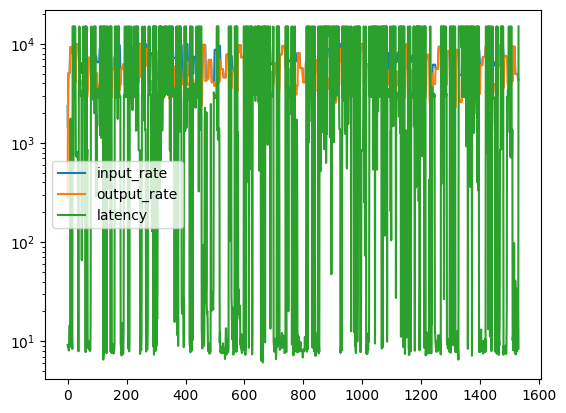

In [18]:
df.iloc[:, :3].plot(logy=True)

In [21]:
abs_path = os.path.join("..\\bridge\\datasets", "random_rate_"+ exp_ls +".csv")
df.to_csv(abs_path, sep=',')


In [24]:
for i in range(6,12):
    exp_ls = f'exp-{i}'
    print(exp_ls)
    df = make_df()
    abs_path = os.path.join("..\\bridge\\datasets", "random_rate_"+ exp_ls +".csv")
    df.to_csv(abs_path, sep=',')

exp-6
exp-7
exp-8
exp-9
exp-10
exp-11


FileNotFoundError: [Errno 2] No such file or directory: '..\\bridge\\data\\random_input_rate\\exp-11\\pcm-memory_new.csv'